### Data cleaning & pre precessing

In [1]:
#Import libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import data set
data = pd.read_excel("Data.xlsx")

In [3]:
#Load data set
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,69,Female,146,286,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133,157,9.355389,19.298875,No
1,46,Male,126,216,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393,92,12.709873,11.230926,No
2,32,Female,122,293,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293,94,12.509046,5.961958,No
3,60,Male,166,242,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263,154,10.381259,8.153887,No
4,25,Male,152,257,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126,91,4.297575,10.815983,No


In [4]:
#Check data set shape
data.shape

(7067, 21)

In [5]:
#Check data set column type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7067 entries, 0 to 7066
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   7067 non-null   int64  
 1   Gender                7067 non-null   object 
 2   Blood Pressure        7067 non-null   int64  
 3   Cholesterol Level     7067 non-null   int64  
 4   Exercise Habits       7067 non-null   object 
 5   Smoking               7067 non-null   object 
 6   Family Heart Disease  7067 non-null   object 
 7   Diabetes              7067 non-null   object 
 8   BMI                   7067 non-null   float64
 9   High Blood Pressure   7067 non-null   object 
 10  Low HDL Cholesterol   7067 non-null   object 
 11  High LDL Cholesterol  7067 non-null   object 
 12  Alcohol Consumption   7067 non-null   object 
 13  Stress Level          7067 non-null   object 
 14  Sleep Hours           7067 non-null   float64
 15  Sugar Consumption    

In [6]:
#Check null values count
data.isnull().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

In [7]:
#check null values
null_counts = data.isnull().sum()
null_counts

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

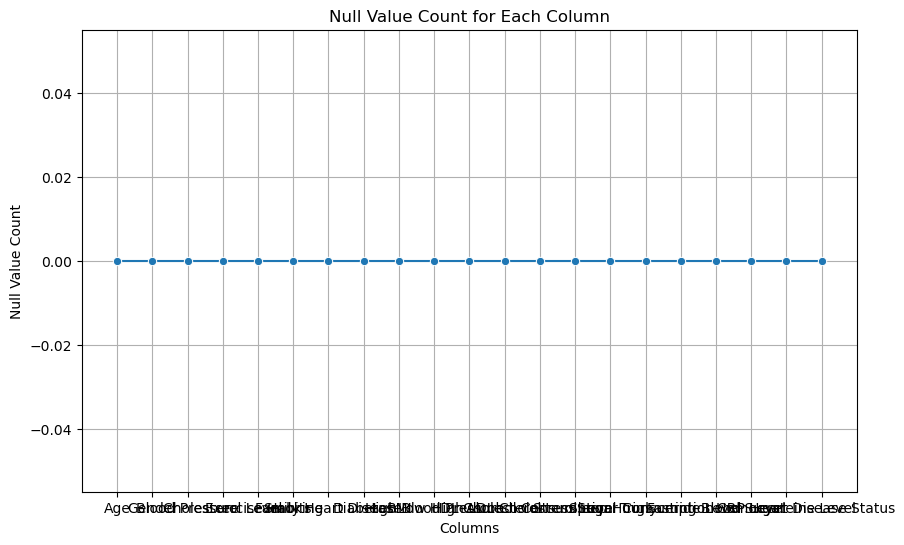

In [8]:
# Plot null values the line chart using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=null_counts.index, y=null_counts.values, marker='o')
plt.title('Null Value Count for Each Column')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.grid(True)
plt.show()

In [11]:
# Check duplicate values
data.duplicated().sum()

0

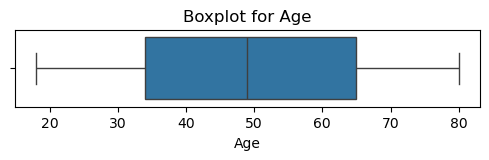

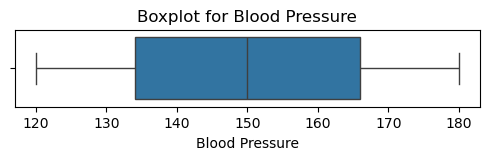

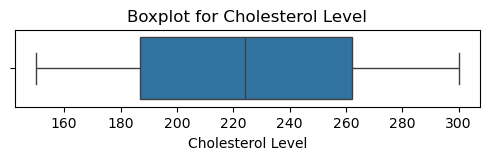

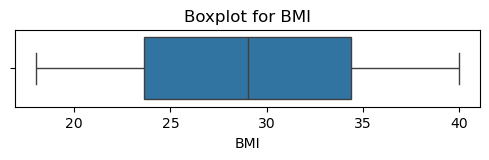

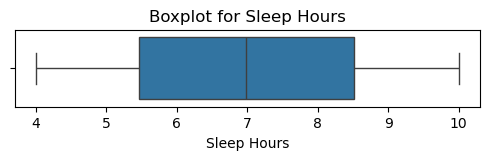

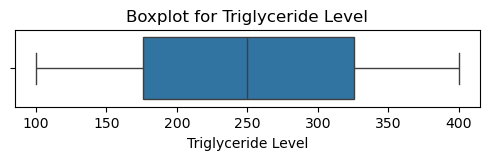

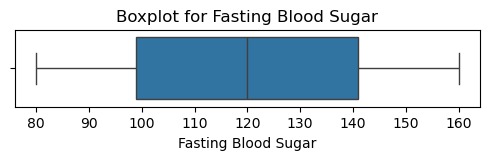

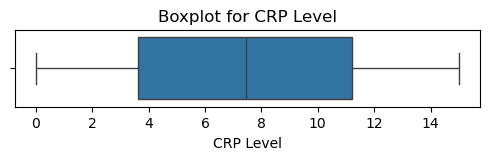

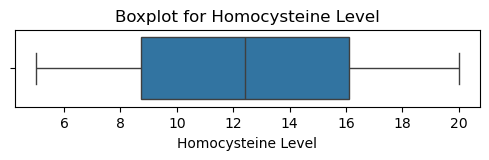

In [12]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))


# For each numerical column, plot a boxplot
for column in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [13]:
data.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,7067.000000,7067.000000,7067.000000,7067.000000,7067.000000,7067.000000,7067.000000,7067.000000,7067.000000
mean,49.301542,149.856092,224.722938,29.023933,6.982595,250.523136,119.966605,7.448118,12.444451
std,18.270030,17.606064,43.529500,6.276510,1.749378,87.051480,23.612628,4.358898,4.311619
min,18.000000,120.000000,150.000000,18.007058,4.000605,100.000000,80.000000,0.010585,5.002810
25%,34.000000,134.000000,187.000000,23.633185,5.459460,176.000000,99.000000,3.629919,8.723192
50%,49.000000,150.000000,224.000000,29.046381,6.982377,250.000000,120.000000,7.445087,12.428130
75%,65.000000,166.000000,262.000000,34.402934,8.519562,326.000000,141.000000,11.209659,16.100166
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [14]:
data.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [15]:
data["Gender"].value_counts()

Gender
Male      3564
Female    3503
Name: count, dtype: int64

In [16]:
data["Exercise Habits"].value_counts()

Exercise Habits
High      2413
Medium    2336
Low       2318
Name: count, dtype: int64

In [17]:
data["Family Heart Disease"].value_counts()

Family Heart Disease
No     3540
Yes    3527
Name: count, dtype: int64

In [18]:
data["Diabetes"].value_counts()

Diabetes
No     3551
Yes    3516
Name: count, dtype: int64

In [20]:
data["High Blood Pressure"].value_counts()

High Blood Pressure
Yes    3561
No     3506
Name: count, dtype: int64

In [21]:
data["Low HDL Cholesterol"].value_counts()

Low HDL Cholesterol
Yes    3540
No     3527
Name: count, dtype: int64

In [22]:
# Convert categorical columns in to numerical columns 
#data = pd.get_dummies(data, columns=['gender', 'job_type', 'social_platform_preference'], drop_first=True)

In [23]:
# look new data set
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,69,Female,146,286,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133,157,9.355389,19.298875,No
1,46,Male,126,216,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393,92,12.709873,11.230926,No
2,32,Female,122,293,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293,94,12.509046,5.961958,No
3,60,Male,166,242,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263,154,10.381259,8.153887,No
4,25,Male,152,257,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126,91,4.297575,10.815983,No


In [24]:
data.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

### EDA

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Blood Pressure'}>,
        <Axes: title={'center': 'Cholesterol Level'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Triglyceride Level'}>],
       [<Axes: title={'center': 'Fasting Blood Sugar'}>,
        <Axes: title={'center': 'CRP Level'}>,
        <Axes: title={'center': 'Homocysteine Level'}>]], dtype=object)

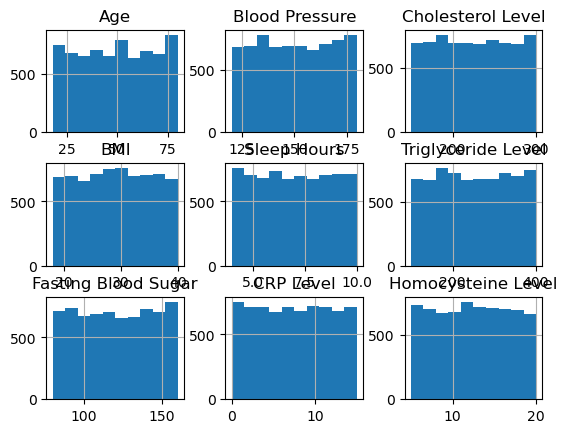

In [26]:
#plothistogram for numerical colums
data.hist()

C:\Users\KMN IT\AppData\Local\Temp\ipykernel_10344\2768558525.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'],bins=20)


<function matplotlib.pyplot.show(close=None, block=None)>

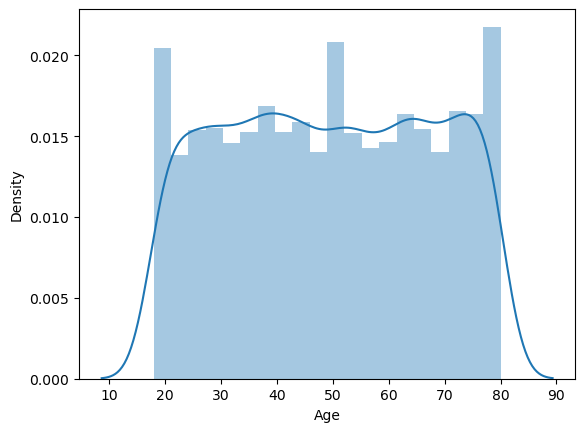

In [27]:
sns.distplot(data['Age'],bins=20)
plt.show

C:\Users\KMN IT\AppData\Local\Temp\ipykernel_10344\1547406467.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Blood Pressure'],bins=20)


<function matplotlib.pyplot.show(close=None, block=None)>

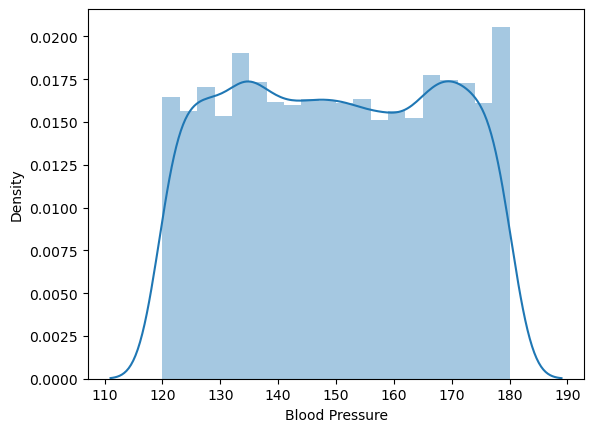

In [28]:
sns.distplot(data['Blood Pressure'],bins=20)
plt.show

C:\Users\KMN IT\AppData\Local\Temp\ipykernel_10344\1069713662.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Cholesterol Level'],bins=20)


<function matplotlib.pyplot.show(close=None, block=None)>

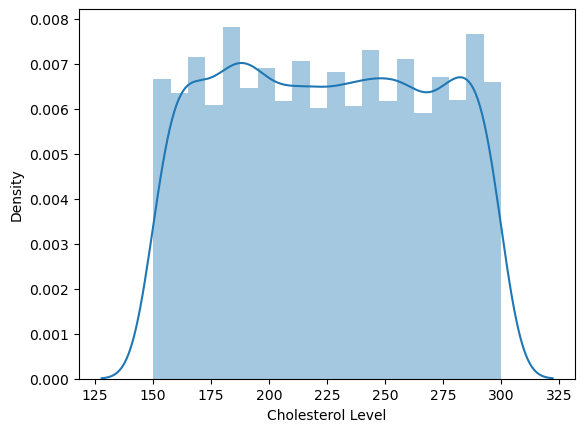

In [61]:
sns.distplot(data['Cholesterol Level'],bins=20)
plt.show

C:\Users\KMN IT\AppData\Local\Temp\ipykernel_10344\2548752912.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BMI'],bins=20)


<function matplotlib.pyplot.show(close=None, block=None)>

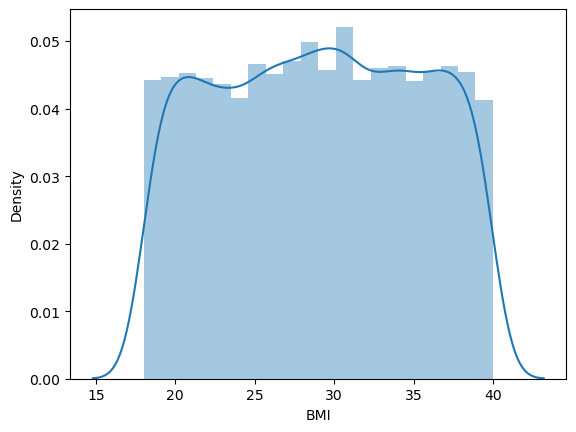

In [63]:
sns.distplot(data['BMI'],bins=20)
plt.show

C:\Users\KMN IT\AppData\Local\Temp\ipykernel_10344\1687069022.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sleep Hours'],bins=20)


<function matplotlib.pyplot.show(close=None, block=None)>

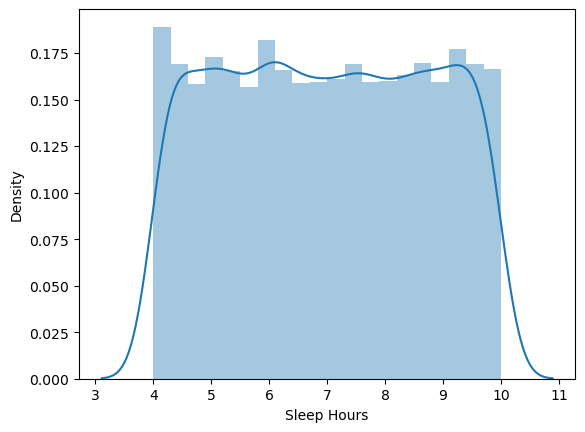

In [65]:
sns.distplot(data['Sleep Hours'],bins=20)
plt.show

C:\Users\KMN IT\AppData\Local\Temp\ipykernel_10344\128245136.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Triglyceride Level'],bins=20)


<function matplotlib.pyplot.show(close=None, block=None)>

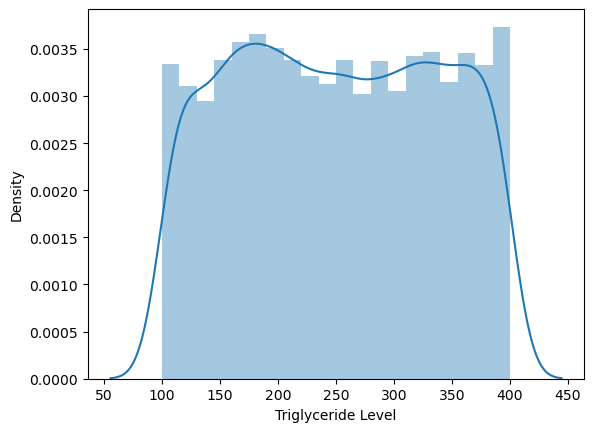

In [67]:
sns.distplot(data['Triglyceride Level'],bins=20)
plt.show

C:\Users\KMN IT\AppData\Local\Temp\ipykernel_10344\3790371259.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Fasting Blood Sugar'],bins=20)


<function matplotlib.pyplot.show(close=None, block=None)>

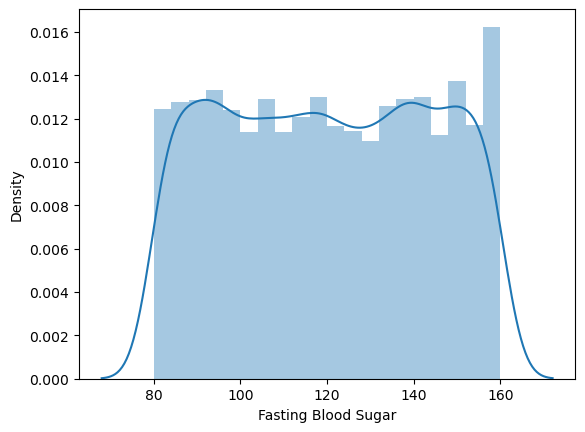

In [69]:
sns.distplot(data['Fasting Blood Sugar'],bins=20)
plt.show

C:\Users\KMN IT\AppData\Local\Temp\ipykernel_10344\4151951798.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CRP Level'],bins=20)


<function matplotlib.pyplot.show(close=None, block=None)>

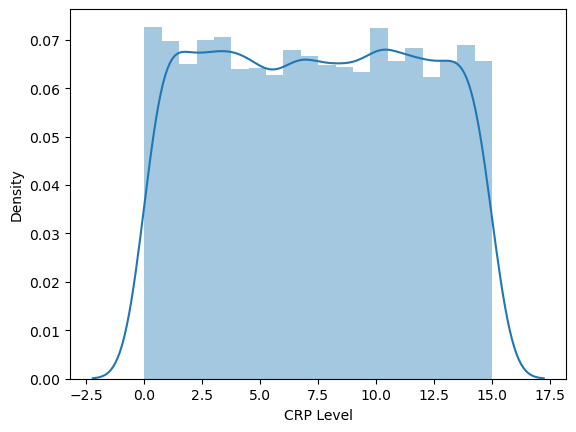

In [71]:
sns.distplot(data['CRP Level'],bins=20)
plt.show

C:\Users\KMN IT\AppData\Local\Temp\ipykernel_10344\1727894256.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Homocysteine Level'],bins=20)


<function matplotlib.pyplot.show(close=None, block=None)>

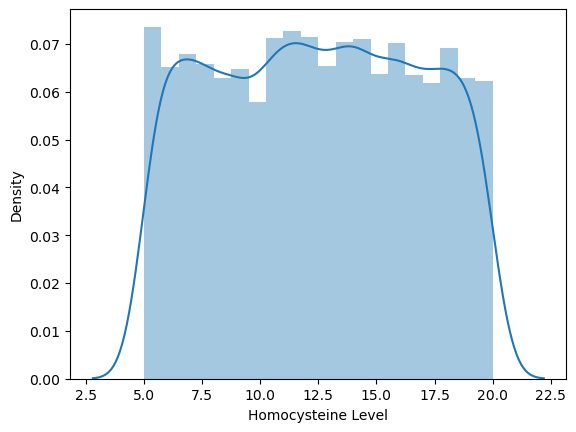

In [73]:
sns.distplot(data['Homocysteine Level'],bins=20)
plt.show

C:\Users\KMN IT\AppData\Local\Temp\ipykernel_10344\135133351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart Disease Status',data = data,palette = 'RdBu_r')


<Axes: xlabel='Heart Disease Status', ylabel='count'>

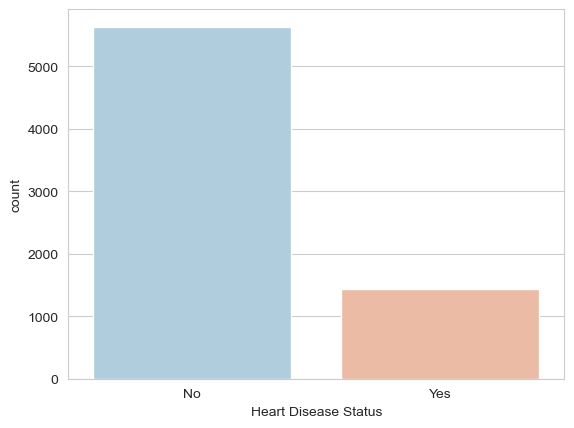

In [75]:
#check balanced or imbalanced dataset
sns.set_style('whitegrid')
sns.countplot(x='Heart Disease Status',data = data,palette = 'RdBu_r')

### PCA

In [78]:
continuous_data = data.select_dtypes(include=[np.number])  # Select only continuous numerical variables
categorical_data = data.select_dtypes(exclude=[np.number])  # Select only categorical (one-hot encoded)

In [80]:
continuous_data.head()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
0,69,146,286,25.221799,8.744034,133,157,9.355389,19.298875
1,46,126,216,29.855447,4.440440,393,92,12.709873,11.230926
2,32,122,293,24.130477,5.249405,293,94,12.509046,5.961958
3,60,166,242,20.486289,7.030971,263,154,10.381259,8.153887
4,25,152,257,28.144681,5.504876,126,91,4.297575,10.815983


In [82]:
from sklearn.preprocessing import StandardScaler

# Step 2: Standardize only the continuous variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(continuous_data)  # This standardizes the data

# Convert the scaled data back to a pandas DataFrame for easier handling
standerd_data = pd.DataFrame(scaled_data, columns=continuous_data.columns)


In [84]:
standerd_data.head()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
0,1.078260,-0.219036,1.407813,-0.605815,1.006965,-1.350137,1.568483,0.437589,1.589869
1,-0.180721,-1.355089,-0.200406,0.132490,-1.453279,1.636812,-1.184476,1.207215,-0.281474
2,-0.947057,-1.582299,1.568635,-0.779701,-0.990817,0.487986,-1.099769,1.161139,-1.503600
3,0.585616,0.917016,0.396933,-1.360350,0.027655,0.143338,1.441424,0.672957,-0.995187
4,-1.330226,0.121780,0.741551,-0.140096,-0.844771,-1.430555,-1.226829,-0.722835,-0.377720


In [86]:
# Step 3: Compute the Covariance Matrix
cov_matrix = np.cov(standerd_data.T)  # Transpose the data to ensure features are in columns
print("Covariance Matrix:")
print(cov_matrix)


Covariance Matrix:
[[ 1.00014152e+00 -1.24799517e-02  1.54878470e-02  1.99020708e-02
   7.32545636e-03 -3.86126886e-03 -1.10465382e-03  3.18403060e-03
  -1.71535871e-02]
 [-1.24799517e-02  1.00014152e+00 -1.59495463e-02  2.14189224e-03
   5.10091598e-04  5.56951432e-03 -9.46953110e-03 -1.43127536e-02
   3.29702953e-03]
 [ 1.54878470e-02 -1.59495463e-02  1.00014152e+00  3.29925277e-02
   8.68695235e-04 -8.95868311e-04  7.00378612e-03 -2.59449687e-02
  -2.82496636e-03]
 [ 1.99020708e-02  2.14189224e-03  3.29925277e-02  1.00014152e+00
  -4.87202184e-03  9.19245211e-03  5.78921670e-03 -1.99109585e-02
  -5.39962832e-04]
 [ 7.32545636e-03  5.10091598e-04  8.68695235e-04 -4.87202184e-03
   1.00014152e+00  7.66980840e-03  7.22725325e-03  7.41159107e-03
  -2.48153688e-02]
 [-3.86126886e-03  5.56951432e-03 -8.95868311e-04  9.19245211e-03
   7.66980840e-03  1.00014152e+00  1.57354485e-02 -5.91886831e-03
  -5.03307070e-03]
 [-1.10465382e-03 -9.46953110e-03  7.00378612e-03  5.78921670e-03
   7.2272

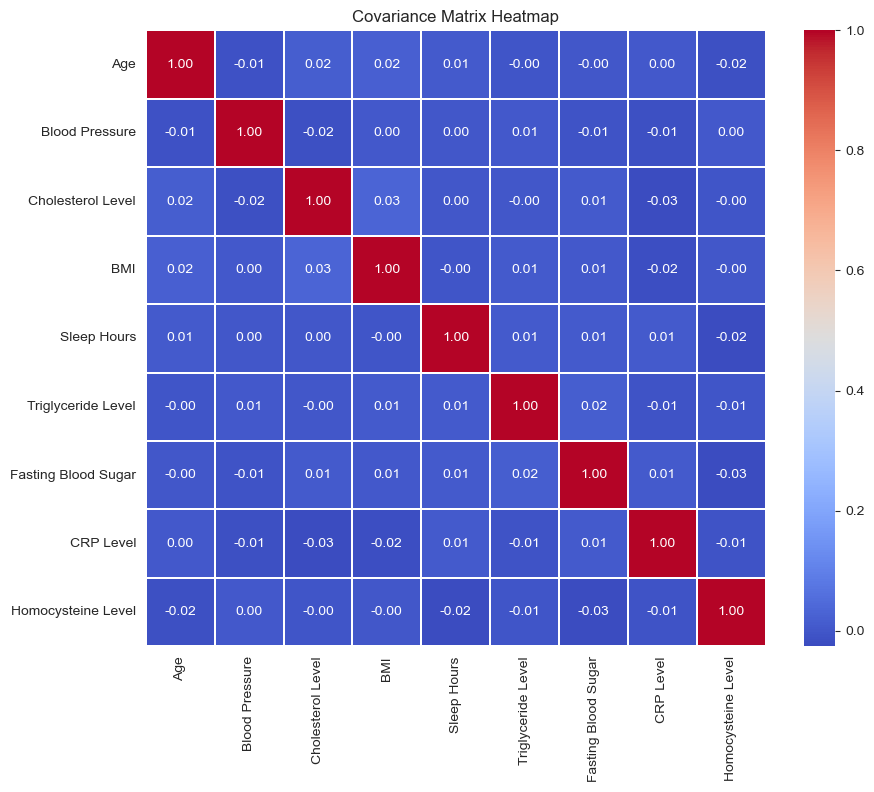

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the Covariance Matrix
cov_matrix = standerd_data.cov()

# Plot the Covariance Matrix as a Heatmap
plt.figure(figsize=(10, 8))  # Set the figure size for better readability
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2)

# Display the plot
plt.title('Covariance Matrix Heatmap')
plt.show()


In [89]:
# Perform Eigenvalue Decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort Eigenvalues and Eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Display sorted eigenvalues and eigenvectors
print("Sorted Eigenvalues (Explained Variance):")
print(eigenvalues_sorted)
print("Sorted Eigenvectors (Principal Components):")
print(eigenvectors_sorted)


Sorted Eigenvalues (Explained Variance):
[1.06372176 1.05321817 1.02145826 1.00365872 0.98786686 0.98466148
 0.97064734 0.96001667 0.95602442]
Sorted Eigenvectors (Principal Components):
[[-0.39671829  0.10149022 -0.36666837 -0.3700009  -0.52472382  0.06962984
  -0.28089532 -0.44415368 -0.06789627]
 [ 0.18336943 -0.18009516  0.55309745 -0.4697253  -0.20427947 -0.41543181
   0.17672738 -0.14865534 -0.37381556]
 [-0.54634738 -0.24394541 -0.12628114  0.10065279  0.37408349  0.0345426
   0.10397253  0.05417143 -0.67899984]
 [-0.51279853 -0.27698937  0.07783765 -0.00567859 -0.32191378 -0.10236177
   0.52091361  0.30606817  0.41843575]
 [-0.14317021  0.40606919  0.17330389 -0.48451822  0.40989617  0.42676996
   0.37151281 -0.19464319  0.15415172]
 [-0.15246101  0.09726958  0.59425885  0.27386968 -0.35417809  0.56911332
  -0.21793036  0.11156454 -0.17284013]
 [-0.26064043  0.38813486  0.23890508  0.50400094  0.06540852 -0.4140539
   0.1128268  -0.52305088  0.09107309]
 [ 0.23656449  0.4883836

In [92]:
# Project the data onto principal components
pca_data = np.dot(standerd_data, eigenvectors_sorted)

# Convert PCA data into a DataFrame for readability
pca_df = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(len(eigenvalues_sorted))])

# Display the first few rows of the PCA data (transformed data)
print("PCA Transformed Data:")
print(pca_df.head())


PCA Transformed Data:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.720655  0.266530 -1.283516  0.198641  0.905619 -0.119247  1.166965   
1  0.338026  0.079657 -0.538159  1.334783 -1.420135  1.266146 -0.659046   
2 -0.167836  0.570515 -1.123195  1.130526  0.700857  0.523872 -0.834408   
3 -0.107053  1.592571  0.471924  0.017530 -0.020900 -1.032311 -0.563389   
4  0.597801 -1.418734 -0.587560 -0.271598  1.371878 -0.929583 -0.256502   

        PC8       PC9  
0 -2.525483 -0.851024  
1  1.806977 -0.382248  
2  2.413146 -1.526128  
3 -0.834181 -1.372634  
4  1.278007 -0.223203  


In [94]:
# Step 7: Calculate the explained variance ratio (percentage of variance explained by each component)
explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)

# Convert the explained variance to percentage
explained_variance_percentage = explained_variance_ratio * 100  # Convert to percentage


print("Explained Variance Ratio (Percentage) for Each Principal Component:")
print(explained_variance_percentage)


Explained Variance Ratio (Percentage) for Each Principal Component:
[11.81745827 11.70076821 11.34793026 11.1501856  10.97474531 10.93913503
 10.78344435 10.66534253 10.62099044]


In [96]:
# Check cumulative explained variance (how much total variance is explained by the first n components)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(cumulative_explained_variance)

[0.11817458 0.23518226 0.34866157 0.46016342 0.56991088 0.67930223
 0.78713667 0.8937901  1.        ]


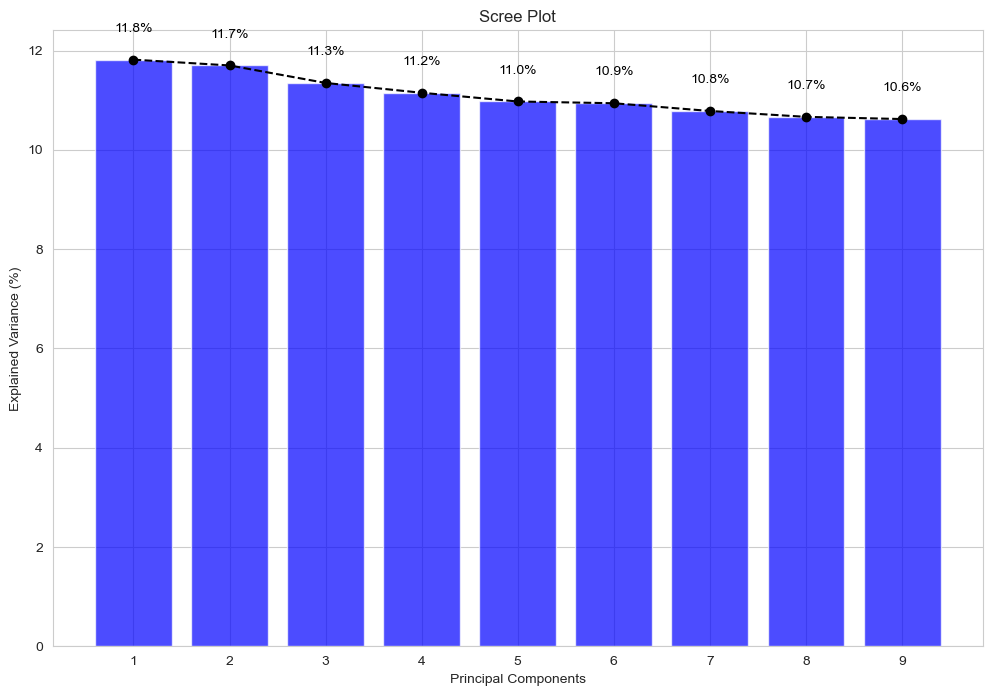

In [98]:
# Step 8: Create the Scree Plot
plt.figure(figsize=(12, 8))

# Plot the explained variance as a bar plot
bars = plt.bar(range(1, len(explained_variance_percentage) + 1), explained_variance_percentage, alpha=0.7, color='blue')

# Add a line showing the explained variance ratio
plt.plot(range(1, len(explained_variance_percentage) + 1), explained_variance_percentage, marker='o', linestyle='--', color='black')

# Add percentage labels above each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = explained_variance_percentage[i]
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', color='black')

# Labeling the plot
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.xticks(range(1, len(explained_variance_percentage) + 1))  # Set x-ticks to represent each principal component

# Show the plot
plt.show()


In [99]:
# Step 9: Display the Factor Loadings (Eigenvectors)
loadings_df = pd.DataFrame(eigenvectors_sorted, columns=continuous_data.columns, index=[f"PC{i+1}" for i in range(len(eigenvalues_sorted))])

print("PCA Loadings (Eigenvectors for Each Principal Component):")
loadings_df.head(10)

PCA Loadings (Eigenvectors for Each Principal Component):


,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
PC1,-0.396718,0.101490,-0.366668,-0.370001,-0.524724,0.069630,-0.280895,-0.444154,-0.067896
PC2,0.183369,-0.180095,0.553097,-0.469725,-0.204279,-0.415432,0.176727,-0.148655,-0.373816
PC3,-0.546347,-0.243945,-0.126281,0.100653,0.374083,0.034543,0.103973,0.054171,-0.679000
PC4,-0.512799,-0.276989,0.077838,-0.005679,-0.321914,-0.102362,0.520914,0.306068,0.418436
PC5,-0.143170,0.406069,0.173304,-0.484518,0.409896,0.426770,0.371513,-0.194643,0.154152
PC6,-0.152461,0.097270,0.594259,0.273870,-0.354178,0.569113,-0.217930,0.111565,-0.172840
PC7,-0.260640,0.388135,0.238905,0.504001,0.065409,-0.414054,0.112827,-0.523051,0.091073
PC8,0.236564,0.488384,-0.295451,0.132841,-0.367679,0.030625,0.513071,0.208918,-0.396946
PC9,0.282656,-0.507457,-0.100436,0.225540,-0.080281,0.364000,0.382383,-0.562543,-0.005047


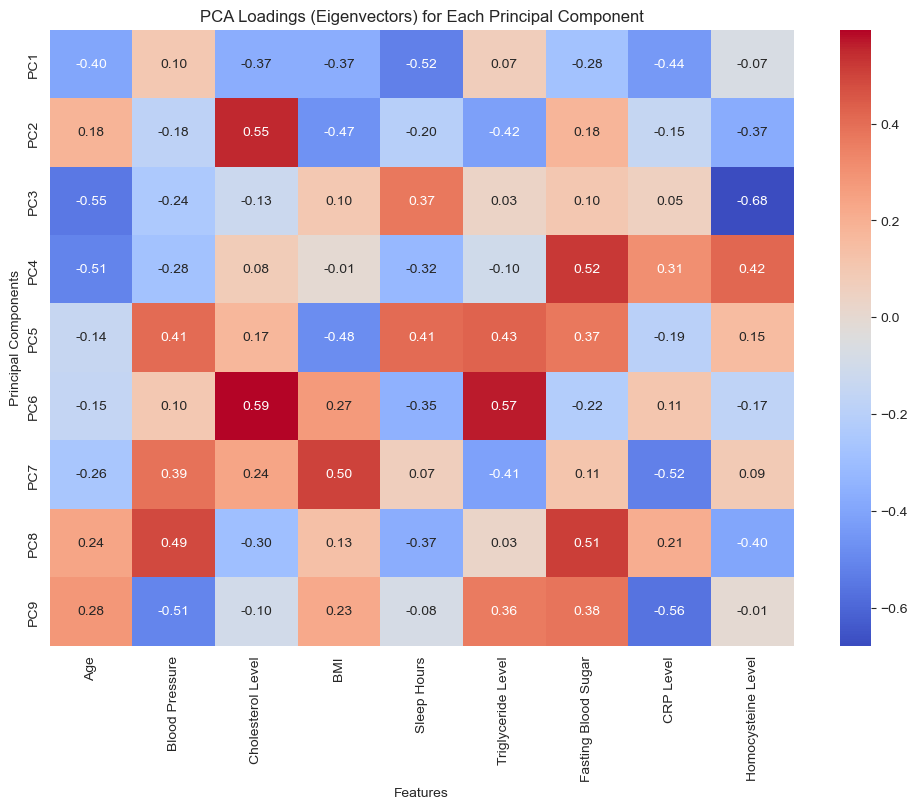

In [102]:
# Visualize the loadings for each principal component using a heatmap
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("PCA Loadings (Eigenvectors) for Each Principal Component")
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.show()


### Factor

In [104]:

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import bartlett

# Step 3: Perform KMO Test
kmo_all, kmo_model = calculate_kmo(standerd_data)
print(f"KMO Test: {kmo_model}")


KMO Test: 0.5090863386516804


In [107]:
#Step 4: Compute the Correlation Matrix
correlation_matrix = np.corrcoef(standerd_data.T)  # Transpose the data to compute correlation
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
[[ 1.00000000e+00 -1.24781857e-02  1.54856554e-02  1.98992546e-02
   7.32441979e-03 -3.86072248e-03 -1.10449751e-03  3.18358005e-03
  -1.71511598e-02]
 [-1.24781857e-02  1.00000000e+00 -1.59472894e-02  2.14158916e-03
   5.10019419e-04  5.56872622e-03 -9.46819114e-03 -1.43107283e-02
   3.29656300e-03]
 [ 1.54856554e-02 -1.59472894e-02  1.00000000e+00  3.29878592e-02
   8.68572312e-04 -8.95741543e-04  7.00279506e-03 -2.59412975e-02
  -2.82456662e-03]
 [ 1.98992546e-02  2.14158916e-03  3.29878592e-02  1.00000000e+00
  -4.87133244e-03  9.19115135e-03  5.78839751e-03 -1.99081410e-02
  -5.39886426e-04]
 [ 7.32441979e-03  5.10019419e-04  8.68572312e-04 -4.87133244e-03
   1.00000000e+00  7.66872310e-03  7.22623057e-03  7.41054231e-03
  -2.48118574e-02]
 [-3.86072248e-03  5.56872622e-03 -8.95741543e-04  9.19115135e-03
   7.66872310e-03  1.00000000e+00  1.57332219e-02 -5.91803077e-03
  -5.03235851e-03]
 [-1.10449751e-03 -9.46819114e-03  7.00279506e-03  5.78839751e-03
   7.226

In [109]:
# Step 3: Perform Eigenvalue Decomposition
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Display eigenvalues and eigenvectors
print("Eigenvalues (Explained Variance):")
print(eigenvalues_sorted)
print("Eigenvectors (Principal Components):")
print(eigenvectors_sorted)


Eigenvalues (Explained Variance):
[1.06357124 1.05306914 1.02131372 1.0035167  0.98772708 0.98452215
 0.97050999 0.95988083 0.95588914]
Eigenvectors (Principal Components):
[[-0.39671829  0.10149022 -0.36666837 -0.3700009  -0.52472382  0.06962984
  -0.28089532 -0.44415368 -0.06789627]
 [ 0.18336943 -0.18009516  0.55309745 -0.4697253  -0.20427947 -0.41543181
   0.17672738 -0.14865534 -0.37381556]
 [-0.54634738 -0.24394541 -0.12628114  0.10065279  0.37408349  0.0345426
   0.10397253  0.05417143 -0.67899984]
 [-0.51279853 -0.27698937  0.07783765 -0.00567859 -0.32191378 -0.10236177
   0.52091361  0.30606817  0.41843575]
 [-0.14317021  0.40606919  0.17330389 -0.48451822  0.40989617  0.42676996
   0.37151281 -0.19464319  0.15415172]
 [-0.15246101  0.09726958  0.59425885  0.27386968 -0.35417809  0.56911332
  -0.21793036  0.11156454 -0.17284013]
 [-0.26064043  0.38813486  0.23890508  0.50400094  0.06540852 -0.4140539
   0.1128268  -0.52305088  0.09107309]
 [ 0.23656449  0.48838361 -0.29545051 

In [111]:
# Step 4: Kaiser’s Criterion (Eigenvalue > 1)
n_factors = np.sum(eigenvalues_sorted > 1)  # Count factors with eigenvalue > 1
print(f"Number of Factors (Eigenvalue > 1): {n_factors}")


Number of Factors (Eigenvalue > 1): 4


In [113]:
from sklearn.decomposition import FactorAnalysis
# Step 3: Perform Factor Analysis (EFA)
n_factors = 4  # You can change this based on how many factors you want to extract
fa = FactorAnalysis(n_components=n_factors, rotation='varimax')  # Varimax rotation for easier interpretation

# Step 4: Fit the model to the scaled data
fa.fit(scaled_data)

# Step 5: Extract the factor loadings (components of each factor)
factor_loadings = fa.components_.T  # Transpose to get features in rows and factors in columns

# Step 6: Create a DataFrame for better readability
loadings_df = pd.DataFrame(factor_loadings, columns=[f'Factor{i+1}' for i in range(n_factors)], index=continuous_data.columns)

# Display the factor loadings
print("Factor Loadings:\n", loadings_df)

Factor Loadings:
                       Factor1   Factor2   Factor3   Factor4
Age                 -0.081651  0.113901 -0.063100 -0.053071
Blood Pressure       0.029173 -0.004588  0.170370 -0.027043
Cholesterol Level   -0.204070  0.004882 -0.040409  0.016503
BMI                 -0.168743  0.018459  0.024078  0.006459
Sleep Hours          0.017960  0.112044  0.011809  0.025350
Triglyceride Level  -0.018344  0.014386  0.057731  0.080892
Fasting Blood Sugar -0.014143  0.055832 -0.025303  0.187068
CRP Level            0.130614  0.052138 -0.101030  0.021460
Homocysteine Level  -0.003295 -0.186259  0.005131 -0.074242


In [114]:
# Step 12: Calculate the explained variance ratio (percentage of variance explained by each factor)
explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)  # Ratio of eigenvalues to total sum

# Convert the explained variance to percentage
explained_variance_percentage = explained_variance_ratio * 100  # Convert to percentage
print("Explained Variance Ratio (Percentage) for Each Factor:")
print(explained_variance_percentage)

# Step 13: Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_percentage)
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)

Explained Variance Ratio (Percentage) for Each Factor:
[11.81745827 11.70076821 11.34793026 11.1501856  10.97474531 10.93913503
 10.78344435 10.66534253 10.62099044]
Cumulative Explained Variance:
[ 11.81745827  23.51822648  34.86615674  46.01634234  56.99108765
  67.93022268  78.71366703  89.37900956 100.        ]


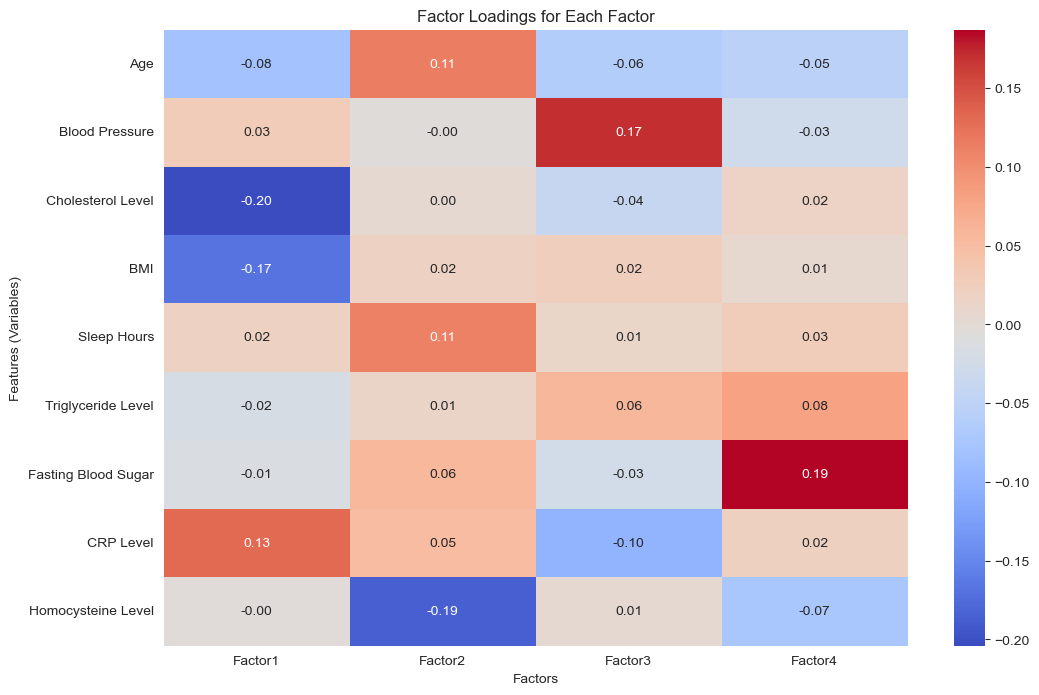

In [117]:
# Step 7: Visualize the factor loadings with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Factor Loadings for Each Factor")
plt.xlabel("Factors")
plt.ylabel("Features (Variables)")
plt.show()

In [118]:
# Step 10: Compute Factor Scores
factor_scores = fa.transform(scaled_data)

# Convert factor scores to a DataFrame
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Factor{i+1}' for i in range(n_factors)])

# Display the factor scores
print(factor_scores_df.head())


    Factor1   Factor2   Factor3   Factor4
0 -0.198106  0.015706 -0.311392  0.069059
1  0.107276 -0.098556 -0.222808 -0.036730
2 -0.014364  0.063867 -0.365845  0.054027
3  0.185016  0.329060 -0.025126  0.300803
4 -0.079596 -0.282211  0.075991 -0.261839


### Descriminent

In [122]:
from scipy.stats import bartlett

# Step 1: Perform Bartlett's test to check for equality of covariance matrices
# We will check each numerical feature by splitting data based on 'Job_status'

bartlett_results = {}

for feature in continuous_data:
    # Split the data by the 'Job_status' classes
    group_data = [data[data['Heart Disease Status'] == label][feature] for label in data['Heart Disease Status'].unique()]
    
    # Perform Bartlett's test
    stat, p_value = bartlett(*group_data)
    bartlett_results[feature] = p_value

# Step 2: Display Bartlett's test results (p-values)
print("Bartlett's Test P-Values for Each Feature:")
for feature, p_value in bartlett_results.items():
    print(f"{feature}: p-value = {p_value}")


Bartlett's Test P-Values for Each Feature:
Age: p-value = 0.5114680066307493
Blood Pressure: p-value = 0.6069316504641564
Cholesterol Level: p-value = 0.6720795853914666
BMI: p-value = 0.5671540821608227
Sleep Hours: p-value = 0.8915914018542113
Triglyceride Level: p-value = 0.7902830440993647
Fasting Blood Sugar: p-value = 0.6994049043612514
CRP Level: p-value = 0.5776171204299083
Homocysteine Level: p-value = 0.8207387148755714


In [124]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np


In [126]:
# Step 3: Select features that do not violate the covariance assumption (p-value >= 0.05)
# From your previous analysis, we assume features like 'actual_productivity_score' violated
# the covariance assumption. So let's remove it.

valid_features = ['Age',"Blood Pressure","Cholesterol Level","BMI","Sleep Hours","Triglyceride Level","Fasting Blood Sugar","CRP Level","Homocysteine Level"]  # Adjust this list

X = data[valid_features]  # Feature matrix (with valid features only)
y = data['Heart Disease Status']    # Target variable (Job status)



In [128]:
# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [130]:
# Step 5: Standardize the data
scaler = StandardScaler()

# Fit on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [132]:
# Step 5: Standardize the data
scaler = StandardScaler()

# Fit on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [134]:
# Step 6: Train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)


LinearDiscriminantAnalysis()

In [136]:
# Extract coefficients (weights) and intercept for the LDA model
coefficients = lda.coef_[0]  # Coefficients for the first class (since it's binary, it compares class 1 to class 0)
intercept = lda.intercept_[0]  # Intercept for the first class


In [138]:
# Construct the discriminant function
function_str = f"Discriminant function: f(x) = "

for i, coeff in enumerate(coefficients):
    function_str += f"{coeff:.4f} * {X_train.columns[i]}"  # Add feature names to the function
    if i < len(coefficients) - 1:
        function_str += " + "

function_str += f" + {intercept:.4f}"  # Add the intercept term

# Print the discriminant function
print(function_str)


Discriminant function: f(x) = -0.0199 * Age + -0.0248 * Blood Pressure + 0.0399 * Cholesterol Level + 0.0727 * BMI + 0.0099 * Sleep Hours + 0.0517 * Triglyceride Level + 0.0419 * Fasting Blood Sugar + -0.0044 * CRP Level + 0.0427 * Homocysteine Level + -1.3896


In [140]:
# Step 7: Make predictions
y_pred = lda.predict(X_test_scaled)

# Step 8: Evaluate the model's performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7901933050447902
Classification Report:
              precision    recall  f1-score   support

          No       0.79      1.00      0.88      1676
         Yes       0.00      0.00      0.00       445

    accuracy                           0.79      2121
   macro avg       0.40      0.50      0.44      2121
weighted avg       0.62      0.79      0.70      2121



C:\Users\KMN IT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KMN IT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KMN IT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


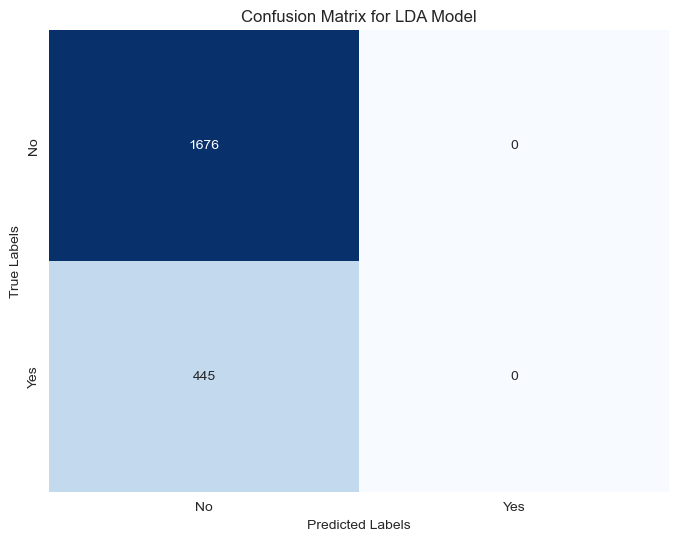

In [142]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Plot the confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=lda.classes_, yticklabels=lda.classes_)
plt.title('Confusion Matrix for LDA Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
